# Enunciado

Los tripulantes de una nave espacial se han perdido en esl espacio. Para saber dónde se encuentran, a la tripulación se le ocurre determinar experimentalmente el valor de la aceleración de la gravedad ($g$), y comparar los resultados con las gravedades conocidas de los planetas del Sistema Solar. 

![Gravedad Planetas Sistema Solar](\data\gravedades-sist-solar.png)

Para calcularla, realizan un experimento de caída libre, que consiste en lo siguiente: dejar caer un pequeño objeto con velocidad inicial nula desde una altura determinada ($h$) y cronometrar el tiempo que tarda en recorrerla ($t$).  
La aceleración de la gravedad se calcula con la fórmula: $h = \frac{1}{2} g t^2$.  
  
- Con una altura $h = 1.00 m$ cronometran $t = 0.46 s$
- Con una altura $h = 2.00 m$ cronometran $t = 0.66 s$
  
***¿En qué planeta se encuentran?*** 

# Planteamiento
No tenemos información suficiente como para poder determinar con certeza en qué planeta se encuentran. Por lo tanto, lo primero que haremos, será simular una base de datos de alturas y tiempos del experimento de caída libre realizado por los astronautas. De esta forma, tendremos datos suficientes como para poder realizar un análisis de los mismos y poder determinar en qué planeta se encuentran.

# Resolución

## Importaciones

In [1]:
# Importaciones necesarias
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from faker import Faker

# Inicializamos Faker
faker = Faker()

print('Done')

Done


## Crear el dataset

Con los datos proporcionados
- h = 1.00, t = 0.46 s
- h = 2.00, t = 0.66 s  
  
vamos a crear una recta, que usaremos como recta de regresión, a partir de la cual vamos a generar datos aleatorios que simulen los datos que se obtendrían en el experimento de caída libre.  
  
La variable independiente será la altura ($h$) y la variable dependiente será el tiempo ($t$).

In [2]:
def ec_recta(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m*x1
    return m, b

r = ec_recta( (1.00, 0.46), (2.00, 0.66))
print(f"La ecuación de la recta es: y = {round(r[0], 2)}x + {round(r[1], 2)}")

La ecuación de la recta es: y = 0.2x + 0.26


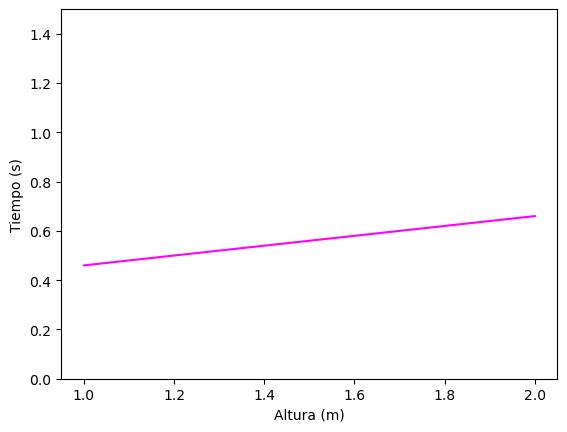

In [3]:
# Recta de regresión
def recta(x):
    return 0.2*x + 0.26

x = np.linspace(1, 2, 100)
y = recta(x)
plt.plot(x, y, color='magenta', label='Recta de regresión')

plt.xlabel('Altura (m)')
plt.ylabel('Tiempo (s)')
plt.ylim(0, 1.5)  # para reducir la escala de la gráfica
plt.show()

Generamos 100 datos aleatorios para cada variable, con una distribución normal, con una media y desviación típica de tal forma que se ajusten a la recta de regresión que hemos creado.

In [4]:
# Datos aleatorios de la Altura
x_values = [faker.random.uniform(1.00, 2.00) for _ in range(100)]

# Usando la recta de regresion, calculamos los valores del Tiempo
y_values = [recta(v) for v in x_values]

#y les añadimos "ruido", para que diverjan un poco de la recta
y_values = [y + random.gauss(0, 0.02) for y in y_values]
                                # desviacion: cuando más cerca de 0 esté el valor, más se aproximan los puntos a la recta


# Creamos el DataFrame
datos = pd.DataFrame({'Altura': x_values,'Tiempo': y_values})
datos.head(100)

,Altura,Tiempo
0,1.777397,0.627238
1,1.589083,0.576381
2,1.052941,0.470998
3,1.680630,0.582015
4,1.204956,0.485500
...,...,...
95,1.393441,0.523178
96,1.499409,0.594065
97,1.335665,0.505813
98,1.158588,0.508870


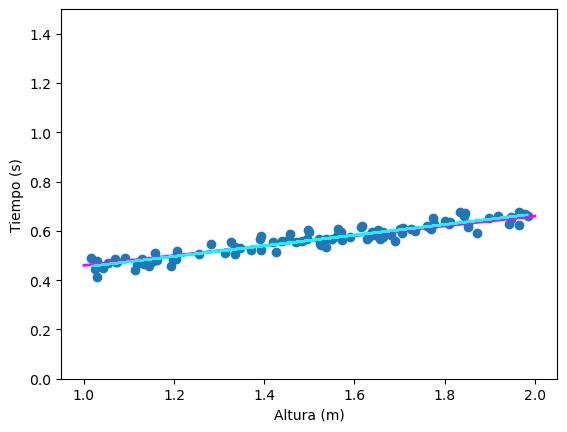

In [5]:
# Graficamos nuestra recta (que hemos usado para generar los datos)
plt.plot(x, y, color='magenta', label='Recta', linewidth=2) # nuestra recta

# Graficamos los datos
plt.scatter(x_values, y_values)  # graficar los datos
# y su recta de regresion  (que será muy parecida a la que hemos usado para generarlos) 
m, b = np.polyfit(x_values, y_values, 1)
plt.plot(x_values, m*np.array(x_values) + b, color='cyan', label='Recta de regresión')

# Nombrar los ejes
plt.xlabel('Altura (m)')
plt.ylabel('Tiempo (s)')
plt.ylim(0, 1.5)
plt.show()

## Calcular la aceleración de la gravedad
Obtenemos ahora, usando la fórmula física, la aceleración de la gravedad ($g$) para cada uno de los datos generados.

In [6]:
def calcular_gravedad(h, t):
    '''Funcion que calcula la gravedad, conocidos la altura y el tiempo de caida'''
    return (2*h) / (t**2)

# AÑADIMOS LA GRAVEDAD CLACULADA AL DATAFRAME
datos_g = datos.copy()  # hacemos una copia del dataframe
g_calculada=[]  # columna que vamos a añadir al dataframe

for i in range(100):
    g_calculada.append(calcular_gravedad(datos.Altura[i], datos.Tiempo[i]))  # añadimos la gravedad calculada a la lista g_calculado

# añadimos la nueva columna
datos_g['g_calculada'] = g_calculada
datos_g.head(100)

,Altura,Tiempo,g_calculada
0,1.777397,0.627238,9.035442
1,1.589083,0.576381,9.566601
2,1.052941,0.470998,9.492834
3,1.680630,0.582015,9.922780
4,1.204956,0.485500,10.224034
...,...,...,...
95,1.393441,0.523178,10.181686
96,1.499409,0.594065,8.497315
97,1.335665,0.505813,10.441139
98,1.158588,0.508870,8.948407


In [7]:
calcular_gravedad(1, 0.46666)

9.183935865681072

In [8]:
calcular_gravedad(2, 0.6666)

9.001800270036005

In [9]:
datos_g.describe()

,Altura,Tiempo,g_calculada
count,100.000000,100.000000,100.000000
mean,1.507374,0.562743,9.502423
std,0.285938,0.065124,0.777456
min,1.016562,0.411914,8.037652
25%,1.243010,0.508538,8.947221
50%,1.535954,0.568094,9.434982
75%,1.727886,0.608881,10.045487
max,1.984216,0.676458,12.123298


La media de los valores de la gravedad calculada es 9.5 $\frac{m}{s^2}$, que es cercano al valor de la gravedad de la Tierra.

## Predecir el planeta

In [10]:
# Creamos un diccionario con los planetas y sus respectivas gravedades
gravedad_planetas = { 'Tierra': 9.8, 'Marte': 3.7, 'Júpiter': 24.8, 'Saturno': 9.0, 'Urano': 8.7, 'Neptuno': 11.0}

def posible_planeta(g_calc):
    ''''Funcion que te dice, según la gravedad que le pases, en qué planeta estás'''
    planetas = {} # creamos un diccionario dif:planeta
    for g in gravedad_planetas.values():  # para cada gravedad de los planetas
        dif = abs(g_calc - g)  # la diferencia entre g_calc y la gravedad real del planeta
        #  asociamos a cada diferencia el planeta correspondiente
        planetas[dif] = list(gravedad_planetas.keys())[list(gravedad_planetas.values()).index(g)]

     # nos devuelve el planeta con la menor diferencia del calculo de gravedad
    return planetas[min(planetas.keys())] 


# AÑADIMOS EL PLANETA POSIBLE AL DATAFRAME
planetas_posibles = []
for i in range(100):
    b = posible_planeta(datos_g.g_calculada[i])
    planetas_posibles.append(b)

datos_g['planeta_posible'] = planetas_posibles
datos_g.head(100)

,Altura,Tiempo,g_calculada,planeta_posible
0,1.777397,0.627238,9.035442,Saturno
1,1.589083,0.576381,9.566601,Tierra
2,1.052941,0.470998,9.492834,Tierra
3,1.680630,0.582015,9.922780,Tierra
4,1.204956,0.485500,10.224034,Tierra
...,...,...,...,...
95,1.393441,0.523178,10.181686,Tierra
96,1.499409,0.594065,8.497315,Urano
97,1.335665,0.505813,10.441139,Neptuno
98,1.158588,0.508870,8.948407,Saturno


In [11]:
datos_g.planeta_posible.value_counts()

Tierra     38
Saturno    29
Urano      21
Neptuno    12
Name: planeta_posible, dtype: int64